In [233]:
% matplotlib inline
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [234]:
data = np.loadtxt('HadCRUT4_month.txt', usecols=1)

In [235]:
len(data)/12
data.shape

(2020,)

In [236]:
n=168
m=7

## Detrending the whole data series

In [224]:
p=40
q=20
data_m = np.zeros([12,n])
data_m_temp=np.zeros([12,n-p,p])
data_m_mean = np.zeros([12,n-p])
data_m_detrend_point = np.zeros([12,n-p])
for k in range(0,12):
    data_m[k] = [data[e*12+k] for e in range(0,n)]
    for j in range(0,n-p):
        data_m_temp[k][j]=[data_m[k][i+j] for i in range(0,p)]
        data_m_mean[k][j]=np.mean(data_m_temp[k][j])
        data_m_detrend_point[k][j] = data_m[k][j+q]-np.mean(data_m_temp[k][j])

In [227]:
data_all=np.transpose(data_m_detrend_point)
data_all=np.ravel(data_all)
data_all.shape

(1536,)

In [226]:
(168-20)*12

1776

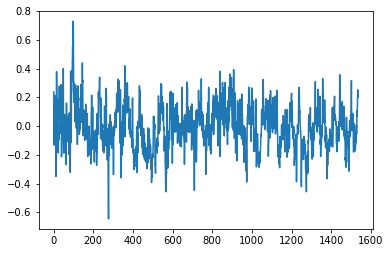

In [228]:
t=np.linspace(1,1536,1536)
plt.plot(t,data_all)

In [202]:
psi=np.std(data_all)
psi

0.20101157875190137

## Create a detrending function

In [237]:
def detrend(input_data):
    p=40
    q=20
    data_m = np.zeros([12,n])
    data_m_temp=np.zeros([12,n-p,p])
    data_m_mean = np.zeros([12,n-p])
    data_m_detrend_point = np.zeros([12,n-p])
    for k in range(0,12):
        data_m[k] = [data[e*12+k] for e in range(0,n)]
        for j in range(0,n-p):
            data_m_temp[k][j]=[data_m[k][i+j] for i in range(0,p)]
            data_m_mean[k][j]=np.mean(data_m_temp[k][j])
            data_m_detrend_point[k][j] = data_m[k][j+q]-np.mean(data_m_temp[k][j])
    data_all=np.transpose(data_m_detrend_point)
    data_all=np.ravel(data_all)
    return data_all

In [239]:
test=detrend(data)

In [240]:
test.shape

(1536,)

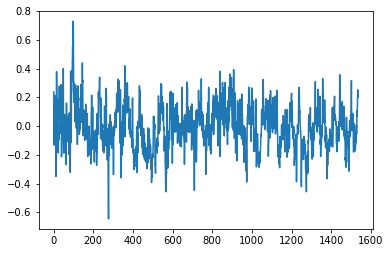

In [241]:
t=np.linspace(1,1536,1536)
plt.plot(t,test)